# Lung Cancer Detector

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

## Explore our data

In [3]:
df = pd.read_excel('cancer patient data sets.xlsx', header=None)
new_header=df.iloc[0]#Reads the first row which contains the headers
df=df[1:]#Slices the rest of the data frame from header
df.columns=new_header#Sets the header labels
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
1,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
2,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
3,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
4,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
5,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.head()

,patient id,age,gender,air pollution,alcohol use,dust allergy,occupational hazards,genetic risk,chronic lung disease,balanced diet,...,fatigue,weight loss,shortness of breath,wheezing,swallowing difficulty,clubbing of finger nails,frequent cold,dry cough,snoring,level
1,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
2,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
3,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
4,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
5,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [6]:
len(df)

1000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient id                1000 non-null   object
 1   age                       1000 non-null   object
 2   gender                    1000 non-null   object
 3   air pollution             1000 non-null   object
 4   alcohol use               1000 non-null   object
 5   dust allergy              1000 non-null   object
 6   occupational hazards      1000 non-null   object
 7   genetic risk              1000 non-null   object
 8   chronic lung disease      1000 non-null   object
 9   balanced diet             1000 non-null   object
 10  obesity                   1000 non-null   object
 11  smoking                   1000 non-null   object
 12  passive smoker            1000 non-null   object
 13  chest pain                1000 non-null   object
 14  coughing of blood       

In [8]:
df.describe()

,patient id,age,gender,air pollution,alcohol use,dust allergy,occupational hazards,genetic risk,chronic lung disease,balanced diet,...,fatigue,weight loss,shortness of breath,wheezing,swallowing difficulty,clubbing of finger nails,frequent cold,dry cough,snoring,level
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,40,2,8,8,8,8,7,7,7,...,8,8,8,8,8,9,7,7,7,3
top,P1,35,1,6,2,7,7,7,6,7,...,3,2,2,2,1,2,3,2,2,High
freq,1,77,598,326,202,405,365,327,308,296,...,212,280,243,240,221,240,230,251,300,365


In [9]:
df.columns

Index(['patient id', 'age', 'gender', 'air pollution', 'alcohol use',
       'dust allergy', 'occupational hazards', 'genetic risk',
       'chronic lung disease', 'balanced diet', 'obesity', 'smoking',
       'passive smoker', 'chest pain', 'coughing of blood', 'fatigue',
       'weight loss', 'shortness of breath', 'wheezing',
       'swallowing difficulty', 'clubbing of finger nails', 'frequent cold',
       'dry cough', 'snoring', 'level'],
      dtype='object', name=0)

In [10]:
df["level"].replace({"HIGH": 2, "MEDIUM":1,"LOW": 0}, inplace = True)
df.head()

,patient id,age,gender,air pollution,alcohol use,dust allergy,occupational hazards,genetic risk,chronic lung disease,balanced diet,...,fatigue,weight loss,shortness of breath,wheezing,swallowing difficulty,clubbing of finger nails,frequent cold,dry cough,snoring,level
1,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
2,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
3,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
4,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
5,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient id                1000 non-null   object
 1   age                       1000 non-null   object
 2   gender                    1000 non-null   object
 3   air pollution             1000 non-null   object
 4   alcohol use               1000 non-null   object
 5   dust allergy              1000 non-null   object
 6   occupational hazards      1000 non-null   object
 7   genetic risk              1000 non-null   object
 8   chronic lung disease      1000 non-null   object
 9   balanced diet             1000 non-null   object
 10  obesity                   1000 non-null   object
 11  smoking                   1000 non-null   object
 12  passive smoker            1000 non-null   object
 13  chest pain                1000 non-null   object
 14  coughing of blood       

In [12]:
df.isna().sum()

0
patient id                  0
age                         0
gender                      0
air pollution               0
alcohol use                 0
dust allergy                0
occupational hazards        0
genetic risk                0
chronic lung disease        0
balanced diet               0
obesity                     0
smoking                     0
passive smoker              0
chest pain                  0
coughing of blood           0
fatigue                     0
weight loss                 0
shortness of breath         0
wheezing                    0
swallowing difficulty       0
clubbing of finger nails    0
frequent cold               0
dry cough                   0
snoring                     0
level                       0
dtype: int64

## Visualize our data

In [13]:
df.head()

,patient id,age,gender,air pollution,alcohol use,dust allergy,occupational hazards,genetic risk,chronic lung disease,balanced diet,...,fatigue,weight loss,shortness of breath,wheezing,swallowing difficulty,clubbing of finger nails,frequent cold,dry cough,snoring,level
1,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
2,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
3,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
4,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
5,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


C:\Users\david\AppData\Local\Temp/ipykernel_15400/3582051154.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"], color = "green");


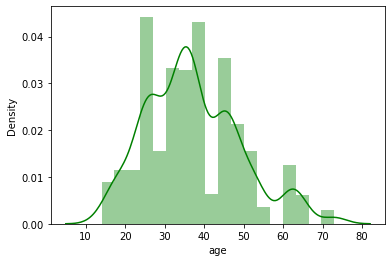

In [14]:
sns.distplot(df["age"], color = "green");

<AxesSubplot:xlabel='level', ylabel='count'>

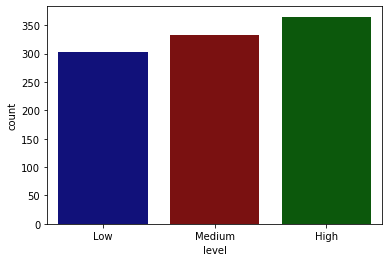

In [15]:
fig, ax=plt.subplots()#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.countplot(data=df, x='level', palette=['darkblue','darkred','darkgreen'])#Count plot
Plotter(plot, 'Level', 'Count', legend=None, save=True, save_name='Level Count.png')#Plotter function for aesthetics
plot

<AxesSubplot:xlabel='level', ylabel='count'>

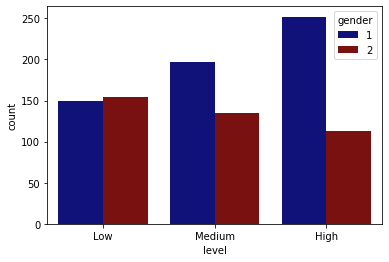

In [16]:
fig, ax=plt.subplots()#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.countplot(data=df, x='level', hue='gender', palette=['darkblue','darkred'])#Count plot
#Plotter(plot, 'Level', 'Count', legend=True, save=True, save_name='Level Count by Gender.png')#Plotter function for aesthetics
plot

In [ ]:
fig, ax=plt.subplots()#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.boxplot(data=cancer, x='Level', y='Age', palette=['darkblue','darkred','darkgreen'])#Count plot
Plotter(plot, 'Level', 'Age', legend=False, save=True, save_name='Level by Age.png')#Plotter function for aesthetics
plot

C:\Users\david\AppData\Local\Temp/ipykernel_15400/3252328023.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["dust allergy"], color = "blue");


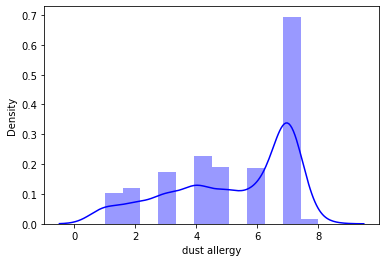

In [19]:
sns.distplot(df["dust allergy"], color = "blue");

C:\Users\david\AppData\Local\Temp/ipykernel_15400/939379550.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["alcohol use"], color = "red");


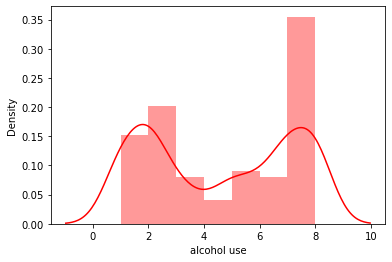

In [20]:
sns.distplot(df["alcohol use"], color = "red");

C:\Users\david\AppData\Local\Temp/ipykernel_15400/4090839962.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["smoking"], color = "indigo");


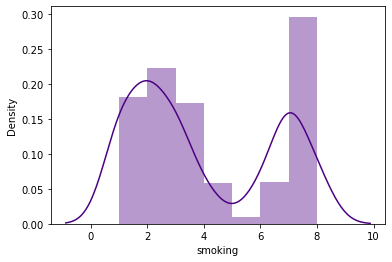

In [21]:
sns.distplot(df["smoking"], color = "indigo");

C:\Users\david\AppData\Local\Temp/ipykernel_15400/501919017.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["shortness of breath"], color = "purple");


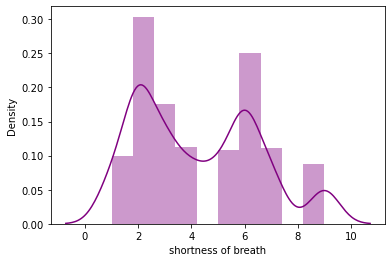

In [22]:
sns.distplot(df["shortness of breath"], color = "purple");

C:\Users\david\AppData\Local\Temp/ipykernel_15400/2004764693.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["chest pain"], color = "maroon");


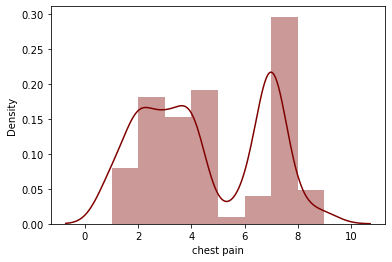

In [23]:
sns.distplot(df["chest pain"], color = "maroon");

In [1]:
fig, ax=plt.subplots()#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.scatterplot(data=cancer, x='Alcohol use',y='Fatigue', hue='Level', palette=['darkblue','darkred','darkgreen'], s=50, marker='o')#Count plot
Plotter(plot, 'Alcohol use', 'Fatique', legend=True, save=True, save_name='Level Dependence on Alcohol and Fatigue.png')#Plotter function for aesthetics
plot

NameError: name 'plt' is not defined

In [26]:
from sklearn.feature_selection import SelectKBest #Feature Selector
from sklearn.feature_selection import f_classif #F-ratio statistic for categorical values

<AxesSubplot:xlabel='Score', ylabel='Feature'>

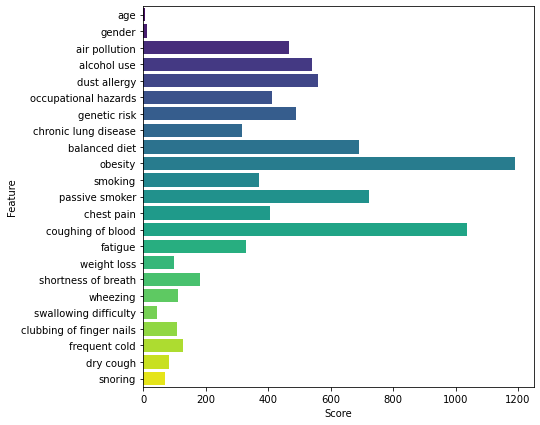

In [27]:
#Feature Selection
X=df.drop(['level','patient id'], axis=1)
Y=df['level']
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns

#Visualize the feature scores
fig, ax=plt.subplots(figsize=(7,7))
plot=sns.barplot(data=featureScores, x='Score', y='Feature', palette='viridis',linewidth=0.5, saturation=2, orient='h')
#Plotter(plot, 'Score', 'Feature', legend=False, save=True, save_name='Feature Importance.png')#Plotter function for aesthetics
plot

In [28]:
#Selection method
selection=featureScores[featureScores['Score']>=200]#Selects features that scored more than 200
selection=list(selection['Feature'])#Generates the features into a list
selection.append('level')#Adding the Level string to be used to make new data frame
new_df=df[selection] #New dataframe with selected features
new_df.head() #Lets take a look at the first 5

,air pollution,alcohol use,dust allergy,occupational hazards,genetic risk,chronic lung disease,balanced diet,obesity,smoking,passive smoker,chest pain,coughing of blood,fatigue,level
1,2,4,5,4,3,2,2,4,3,2,2,4,3,Low
2,3,1,5,3,4,2,2,2,2,4,2,3,1,Medium
3,4,5,6,5,5,4,6,7,2,3,4,8,8,High
4,7,7,7,7,6,7,7,7,7,7,7,8,4,High
5,6,8,7,7,7,6,7,7,8,7,7,9,3,High


## Fit and instantiate model

#### Test 2 models

In [29]:
def evaluate(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [30]:
scaler = StandardScaler()

X = new_df.drop("level", axis = 1)
y = new_df["level"]

df = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
df.head()

,air pollution,alcohol use,dust allergy,occupational hazards,genetic risk,chronic lung disease,balanced diet,obesity,smoking,passive smoker,chest pain,coughing of blood,fatigue
0,-0.906679,-0.214954,-0.083340,-0.398718,-0.743202,-1.288162,-1.167040,-0.218941,-0.380013,-0.949961,-1.069735,-0.353971,-0.381548
1,-0.413919,-1.360357,-0.083340,-0.873383,-0.272821,-1.288162,-1.167040,-1.160623,-0.780870,-0.084393,-1.069735,-0.766045,-1.273014
2,0.078842,0.166847,0.421751,0.075946,0.197560,-0.205673,0.706970,1.193582,-0.780870,-0.517177,-0.192184,1.294323,1.847119
3,1.557123,0.930449,0.926842,1.025275,0.667941,1.418061,1.175473,1.193582,1.223416,1.213959,1.124143,1.294323,0.064186
4,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,1.193582,1.624274,1.213959,1.124143,1.706397,-0.381548


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
models = {
         "SVC": SVC(),
         "Naive Bayes": GaussianNB()      
        }

In [33]:
model_scores = evaluate(models = models,
                        X_train = X_train,
                        X_test = X_test,
                        y_train = y_train,
                        y_test = y_test)

model_scores

{'SVC': 1.0, 'Naive Bayes': 0.815}

In [34]:
model_scores = model_scores.values()
model_scores = list(model_scores)
svc = model_scores[0]
nb = model_scores[1]

In [35]:
print(f"SVC: {svc * 100:.2f}%")
print(f"Naive Bayes: {nb * 100:.2f}%")

SVC: 100.00%
Naive Bayes: 81.50%


### Final fitting

In [36]:
model = SVC(probability = True)
model.fit(X_train, y_train)

model.score(X_test, y_test)

1.0

In [37]:
y_preds = model.predict(X_test)
y_preds

array(['Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Low', 'High', 'Low', 'High', 'High', 'High', 'High', 'Medium',
       'Low', 'Medium', 'High', 'Low', 'Medium', 'High', 'Low', 'Low',
       'Low', 'High', 'Medium', 'Low', 'Low', 'High', 'High', 'Medium',
       'High', 'Low', 'High', 'High', 'Low', 'Medium', 'Medium', 'Low',
       'Low', 'Medium', 'High', 'Low', 'Medium', 'High', 'Low', 'High',
       'High', 'High', 'Low', 'High', 'High', 'Low', 'Medium', 'Low',
       'High', 'High', 'Low', 'Medium', 'High', 'High', 'Medium', 'High',
       'High', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'High',
       'Low', 'Low', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
       'High', 'High', 'High', 'Low', 'High', 'High', 'Low', 'Low',
       'Medium', 'High', 'High', 'High', 'High', 'High', 'Medium', 'Low',
       'Low', 'High', 'Low', 'Low', 'Medium', 'High', 'High', 'Medium

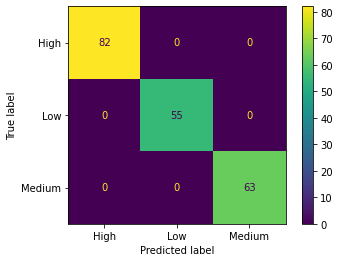

In [38]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test, 
                                        y_pred = y_preds);

In [39]:
def model_report(y_test, y_preds):
    print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
    print(f"Precision: {precision_score(y_test, y_preds)}")
    print(f"Recall: {recall_score(y_test, y_preds)}")
    print(f"R2 Score: {r2_score(y_test, y_preds)}")
    print(f"F1 Score: {f1_score(y_test, y_preds)}")
    print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
    print(f"MSE: {mean_squared_error(y_test, y_preds)}")

In [40]:
model_report(y_test, y_preds)

Accuracy: 100.00%


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [41]:
X_test

,air pollution,alcohol use,dust allergy,occupational hazards,genetic risk,chronic lung disease,balanced diet,obesity,smoking,passive smoker,chest pain,coughing of blood,fatigue
522,1,6,7,8,7,6,7,7,3,4,8,7,3
738,6,8,7,7,7,6,2,4,1,2,4,3,2
741,6,8,7,7,7,6,2,4,1,2,4,3,2
661,7,7,7,7,6,7,7,7,7,7,7,8,4
412,1,6,7,5,3,2,6,2,3,3,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,2,1,5,3,2,3,2,4,1,4,2,4,6
333,6,8,7,7,7,6,7,7,8,7,7,9,3
209,6,7,7,7,7,6,7,7,7,8,7,7,5
614,2,3,2,1,3,2,1,2,7,6,2,2,2


In [42]:
y_probs = model.predict_proba(X_test)
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.00431455, 0.00426119, 0.00426119, 0.0017428 , 0.00411843,
       0.00034037, 0.00426119, 0.00411843, 0.00426119, 0.00426119])

In [43]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color = "green", label = "ROC")

    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend();

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
plot_roc_curve(fpr, tpr)

ValueError: multiclass format is not supported

In [45]:
import joblib
joblib.dump(model, 'xgbpipe.joblib') 

['xgbpipe.joblib']

In [46]:
model2 = joblib.load('xgbpipe.joblib')

In [47]:
df.columns

Index(['air pollution', 'alcohol use', 'dust allergy', 'occupational hazards',
       'genetic risk', 'chronic lung disease', 'balanced diet', 'obesity',
       'smoking', 'passive smoker', 'chest pain', 'coughing of blood',
       'fatigue'],
      dtype='object', name=0)

In [60]:
a =np.array(13)
a= (2,1,8,1,1,2,1,5,1,1,1,2,8)


In [61]:
y_preds = model2.predict([a])
y_preds

C:\Users\david\miniconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Medium'], dtype=object)